In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gplearn.extra_fitness as oldfitness
import gplearn.extra_fitness_2 as newfitness
import pandas as pd
import numpy as np

In [3]:
df = pd.read_parquet('/home/pennymax/proj/MFM/CrossSection/v1_basic/basic_8h_2/fct_proc.parquet')
# start_date = '2020-09-01 00:00:00+00:00'
start_date = '2021-01-01 00:00:00+00:00'
end_date = '2024-01-01 00:00:00+00:00'
df = df.query('@start_date <= time < @end_date')
display(df)
display(df.index.get_level_values(0).unique())

Open      High       Low     Close  \
time                      symbol                                              
2021-01-01 00:00:00+00:00 AAVEUSDT   88.58100  89.47900  86.00000  86.70000   
                          ADAUSDT     0.18158   0.18510   0.17751   0.17963   
                          ALGOUSDT    0.33630   0.36750   0.33150   0.35770   
                          ALPHAUSDT   0.18514   0.19439   0.18178   0.18907   
                          ATOMUSDT    6.47200   6.52500   5.86400   6.03200   
...                                       ...       ...       ...       ...   
2023-12-31 16:00:00+00:00 YGGUSDT     0.42610   0.44570   0.40710   0.42610   
                          ZECUSDT    28.46000  28.57000  25.47000  26.93000   
                          ZENUSDT     9.47300   9.60900   8.63000   9.06100   
                          ZILUSDT     0.02533   0.02572   0.02400   0.02480   
                          ZRXUSDT     0.36810   0.38640   0.35870   0.37200   

                                           Volume        QuoVol    TrdCnt  \
time                      symbol                                            
2021-01-01 00:00:00+00:00 AAVEUSDT   1.347638e+05  1.181694e+07   33205.0   
                          ADAUSDT    1.887684e+08  3.430339e+07  105421.0   
                          ALGOUSDT   3.803409e+07  1.336980e+07   59053.0   
                          ALPHAUSDT  6.627971e+06  1.254867e+06    9378.0   
                          ATOMUSDT   2.747973e+06  1.714340e+07   67310.0   
...                                           ...           ...       ...   
2023-12-31 16:00:00+00:00 YGGUSDT    2.090920e+07  8.998258e+06   73970.0   
                          ZECUSDT    6.489027e+05  1.773391e+07   82423.0   
                          ZENUSDT    1.193518e+06  1.097834e+07   93218.0   
                          ZILUSDT    3.197006e+08  8.006506e+06   45641.0   
                          ZRXUSDT    2.997073e+07  1.121517e+07   72115.0   

                                      TakerBuyVol  TakerBuyQuoVol  \
time                      symbol                                    
2021-01-01 00:00:00+00:00 AAVEUSDT   5.775570e+04    5.067498e+06   
                          ADAUSDT    8.132880e+07    1.481382e+07   
                          ALGOUSDT   1.883778e+07    6.622769e+06   
                          ALPHAUSDT  3.526237e+06    6.682813e+05   
                          ATOMUSDT   1.207255e+06    7.538994e+06   
...                                           ...             ...   
2023-12-31 16:00:00+00:00 YGGUSDT    9.465695e+06    4.081564e+06   
                          ZECUSDT    2.529282e+05    6.929311e+06   
                          ZENUSDT    4.803335e+05    4.426438e+06   
                          ZILUSDT    1.390138e+08    3.484169e+06   
                          ZRXUSDT    1.442174e+07    5.393244e+06   

                                     funding_rate  ...  avgtrdquo5  \
time                      symbol                   ...               
2021-01-01 00:00:00+00:00 AAVEUSDT       0.000543  ...  315.353822   
                          ADAUSDT        0.000269  ...  340.824259   
                          ALGOUSDT       0.000100  ...  190.878568   
                          ALPHAUSDT      0.000100  ...  127.297250   
                          ATOMUSDT       0.000290  ...  222.705792   
...                                           ...  ...         ...   
2023-12-31 16:00:00+00:00 YGGUSDT        0.000630  ...  112.184503   
                          ZECUSDT        0.000511  ...  183.972953   
                          ZENUSDT        0.000394  ...  101.876953   
                          ZILUSDT        0.000469  ...  157.213519   
                          ZRXUSDT        0.000489  ...  139.593260   

                                     vwap_bias1  vwap_bias3  vwap_bias5  \
time                      symbol                                          
2021-01-01 00:00:00+00:00 AAVEUSDT     1.011376    0

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-01 08:00:00+00:00',
               '2021-01-01 16:00:00+00:00', '2021-01-02 00:00:00+00:00',
               '2021-01-02 08:00:00+00:00', '2021-01-02 16:00:00+00:00',
               '2021-01-03 00:00:00+00:00', '2021-01-03 08:00:00+00:00',
               '2021-01-03 16:00:00+00:00', '2021-01-04 00:00:00+00:00',
               ...
               '2023-12-28 16:00:00+00:00', '2023-12-29 00:00:00+00:00',
               '2023-12-29 08:00:00+00:00', '2023-12-29 16:00:00+00:00',
               '2023-12-30 00:00:00+00:00', '2023-12-30 08:00:00+00:00',
               '2023-12-30 16:00:00+00:00', '2023-12-31 00:00:00+00:00',
               '2023-12-31 08:00:00+00:00', '2023-12-31 16:00:00+00:00'],
              dtype='datetime64[us, UTC]', name='time', length=3285, freq=None)

In [4]:
from MFM.CrossSection.v1_basic.basic_8h_2.pipeline_steps import _get_X_y, _convert_expression_to_gp_program

X, y, feature_names = _get_X_y(df)
w = np.ones(X.shape[0])
print(X.shape, y.shape, w.shape, len(feature_names))

(3285, 52, 256) (3285, 256) (3285,) 52


In [5]:
from gplearn.genetic import _all_func_dictionary

exp = 'netbuyquo3'
exp = 'ta_APO_12_26(ts_autocorr_60_1(signed_log(ts_autocorr_20_10(trd_vwap_bias5))))'
exp = 'tszs_120_add(ta_BBANDSl_5_2_2(spot_Open), ta_TEMA_5(netbuyquo3))'
# exp = 'np.diff(valid_data, axis=0)'
exp = 'ta_EMA_20(tszs_120(Close))'
exp = 'Open'

print(f'ori expression: {exp}')
gp = _convert_expression_to_gp_program(exp, _all_func_dictionary, feature_names)
print(f'_Program print: {gp}')

y_pred = gp.execute_3D(X)
display(pd.DataFrame(y_pred))
display(pd.DataFrame(y_pred).describe())


ori expression: Open
_Program print: Open


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,88.581,0.18158,0.3363,0.18514,6.472,3.1894,0.53779,13.618,5.3561,0.1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86.730,0.17963,0.3579,0.18907,6.032,3.1846,0.52306,14.024,5.5761,0.2038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87.393,0.18076,0.4088,0.20057,5.933,3.6614,0.56517,14.308,5.6213,0.2084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90.940,0.17526,0.3987,0.21709,5.873,3.6565,0.59533,13.949,5.5067,0.2046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86.616,0.17260,0.4355,0.23128,5.608,3.6735,0.59489,14.195,5.8397,0.2047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,115.490,0.60400,0.2238,0.12846,10.824,39.1480,9.00100,4.284,1.9343,0.2469,...,1.0792,0.11627,0.017641,0.014308,0.3265,0.6475,0.3693,0.03227,3.583,2.2130
3281,112.630,0.61010,0.2254,0.13013,10.907,39.8610,9.07900,4.309,1.9605,0.2469,...,1.1039,0.11551,0.017489,0.014649,0.3279,0.6400,0.3661,0.03197,3.592,2.2259
3282,111.110,0.60150,0.2214,0.12931,10.762,39.3790,9.07700,4.281,1.9414,0.2462,...,1.0962,0.11738,0.016835,0.014060,0.3313,0.6224,0.3640,0.03296,3.626,2.2087
3283,113.630,0.60800,0.2237,0.13195,10.897,40.3700,9.14900,4.311,2.1959,0.2583,...,1.1358,0.11460,0.017038,0.014410,0.3387,0.6312,0.3877,0.03382,3.645,2.2583


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,...,83.000000,75.000000,74.000000,59.000000,59.000000,47.000000,44.000000,44.000000,41.000000,11.000000
mean,170.326086,0.829801,0.650541,0.480839,16.060234,32.988149,27.026030,14.947707,4.594461,0.513290,...,0.963282,0.116216,0.019141,0.017995,0.361946,0.638445,0.367927,0.034391,3.218268,2.255518
std,127.200614,0.633177,0.557824,0.548636,8.985550,28.356105,35.880495,14.457316,4.443843,0.346441,...,0.224098,0.009381,0.002112,0.004155,0.027583,0.051988,0.010056,0.001473,0.478930,0.062912
min,46.890000,0.172600,0.088500,0.063830,5.235000,3.184600,0.450580,2.940000,0.960600,0.160200,...,0.586300,0.100640,0.014987,0.010092,0.321600,0.535000,0.339000,0.031970,2.577000,2.191100
25%,72.600000,0.352800,0.202300,0.106500,9.474000,13.531000,6.030000,5.244000,1.432500,0.231000,...,0.691300,0.107335,0.017712,0.014739,0.338250,0.589000,0.363625,0.033333,2.740000,2.210850
50%,98.390000,0.494000,0.358500,0.148300,12.042000,19.100000,9.057000,7.122000,2.000100,0.365900,...,1.055600,0.114600,0.019053,0.018395,0.357600,0.640000,0.369150,0.034405,3.189000,2.228500
75%,271.790000,1.220030,0.997000,0.743300,21.683000,41.777600,40.540000,20.584000,7.096900,0.736000,...,1.133650,0.122750,0.020167,0.020130,0.382050,0.679600,0.372425,0.035423,3.645000,2.287150
max,654.880000,3.022800,2.391000,2.830120,44.283000,139.163000,160.290000,72.131000,21.854000,1.765600,...,1.361800,0.137250,0.026083,0.031785,0.430300,0.767300,0.395300,0.038450,4.088000,2.394900


In [6]:
oldfitness.fitness_quantile35_longshort_sharpe_fine_cumprod_with_fee(y, y_pred, w)

-0.887930193286719

In [12]:
# longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=oldfitness._fee_rate)
longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=0)
oldfitness.sharpe_fine(longshort_rets, comp=True, annual_bars=oldfitness._annual_bar_8h)

-0.8801872303866289

In [11]:
longshort_rets = newfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=newfitness._fee_rate)
# longshort_rets = newfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=0)
newfitness.sharpe_fine(longshort_rets, comp=True, annual_bars=newfitness._annual_bar_8h)

-0.8926007864802668

In [10]:
quantile = 35
fee_rate = 0.001

grouped_returns, factor_quantiles = newfitness.quantile_returns_and_groups(y, y_pred, quantile)
if grouped_returns is None or factor_quantiles is None or \
    np.all(np.isnan(grouped_returns)) or np.all(np.isnan(factor_quantiles)) or \
    grouped_returns.shape[1] != quantile:
    print('invalid') # note: need to handle full empty result in downstream!
longshort_rets = (grouped_returns[:, 34] - grouped_returns[:, 0]) / 2
# long
pfl = factor_quantiles == quantile
long_rates = newfitness.turnover_rates(pfl)
display(pd.DataFrame(long_rates))
# short
pfl = factor_quantiles == 1
short_rates = newfitness.turnover_rates(pfl)
longshort_rates = (long_rates + short_rates) / 2
longshort_fee = longshort_rates * fee_rate
longshort_rets_fee = longshort_rets - longshort_fee

## wrap to pandas obj for downstream TODO
longshort_rets_fee = pd.Series(longshort_rets_fee)
longshort_rets = pd.Series(longshort_rets)
grouped_returns = pd.DataFrame(grouped_returns)



pd.DataFrame(longshort_rates).mean()
np.nanmean(longshort_rates)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3280,0.0
3281,0.0
3282,0.0
3283,0.0


0.008761868522142495

/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)
/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)


71           NaN
72     -0.023243
73     -0.009092
74      0.002925
75      0.004250
          ...   
3646    0.002312
3647    0.000845
3648    0.020836
3649   -0.029524
3650    0.017650
Length: 3580, dtype: float64

<Axes: >

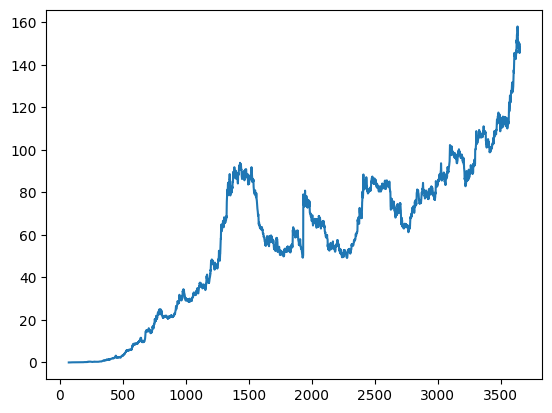

In [71]:
longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=oldfitness._fee_rate)
# longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=0)
display(longshort_rets)
longshort_rets.add(1).cumprod().sub(1).plot()

In [72]:
oldfitness.sharpe_fine(longshort_rets, comp=True, annual_bars=oldfitness._annual_bar_8h)

4.573301399707971